In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("playlist_2010to2022.csv")
df.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [ ]:
df.isnull().sum()

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [ ]:
df['artist_genres'].value_counts()

['pop']                                                              135
['dance pop', 'pop']                                                 129
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']     32
['dance pop', 'pop', 'pop rap']                                       29
['barbadian pop', 'pop', 'urban contemporary']                        27
                                                                    ... 
['atl hip hop', 'dirty south rap']                                     1
['gangster rap', 'harlem hip hop', 'pop rap', 'trap']                  1
['rap kreyol']                                                         1
['bass house', 'old school bassline', 'uk garage']                     1
['atl hip hop', 'melodic rap', 'rap', 'trap']                          1
Name: artist_genres, Length: 698, dtype: int64

In [ ]:
df['artist_genres'] = df['artist_genres'].str.split(', ')
df = df.explode('artist_genres').reset_index(drop=True)

In [ ]:
df.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,['permanent wave',86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.234,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,'pop'],86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.234,0.285,173.372,266773.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,['alternative metal',75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.612,0.684,148.726,167067.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,'modern rock',75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.612,0.684,148.726,167067.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,'pop punk',75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.612,0.684,148.726,167067.0,4.0


In [ ]:
df['artist_genres'] = df['artist_genres'].str.replace(r"\[|\]", "", regex=True)

In [ ]:
df['artist_genres'].value_counts()

'pop'                          993
'dance pop'                    537
'rap'                          383
'pop rap'                      305
'hip hop'                      250
                              ... 
'christian music'                1
'christian rock'                 1
'rock independant francais'      1
'leicester indie'                1
'melodic drill'                  1
Name: artist_genres, Length: 438, dtype: int64

In [ ]:
# df['artist_genres'].unique()

<Axes: xlabel='energy', ylabel='danceability'>

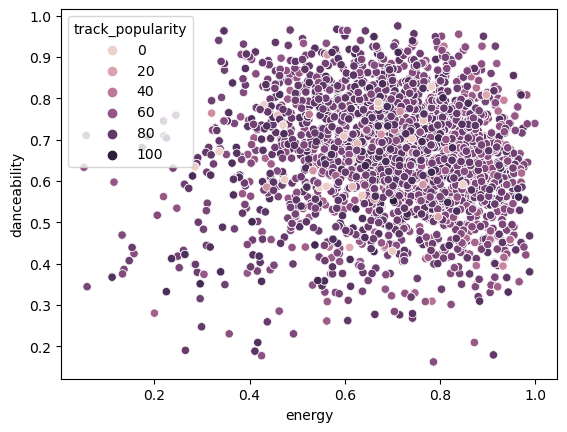

In [ ]:
sns.scatterplot(data = df,x = 'energy', y="danceability", hue = 'track_popularity')

In [ ]:
df.to_csv('Spotify_Analysis.csv', index = False)